In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('lc_loan.csv')

In [2]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

                 id      loan_amnt    funded_amnt       int_rate  \
count  9.331600e+05  933160.000000  933160.000000  933160.000000   
mean   4.874545e+07   12559.115559   12555.207923       0.119775   
std    3.076442e+07    8042.750083    8041.765370       0.039952   
min    5.473400e+04     500.000000     500.000000       0.053200   
25%    1.678208e+07    6425.000000    6400.000000       0.089000   
50%    5.460330e+07   10000.000000   10000.000000       0.115300   
75%    7.516536e+07   16275.000000   16200.000000       0.143300   
max    9.645316e+07   40000.000000   40000.000000       0.309900   

         installment    annual_inc            dti    delinq_2yrs  \
count  933160.000000  9.331600e+05  933160.000000  933160.000000   
mean      416.318741  7.412200e+04      17.833822       0.331903   
std       268.816718  6.938399e+04       8.377159       0.899913   
min        14.010000  3.000000e+03      -1.000000       0.000000   
25%       215.630000  4.400000e+04      11.5200

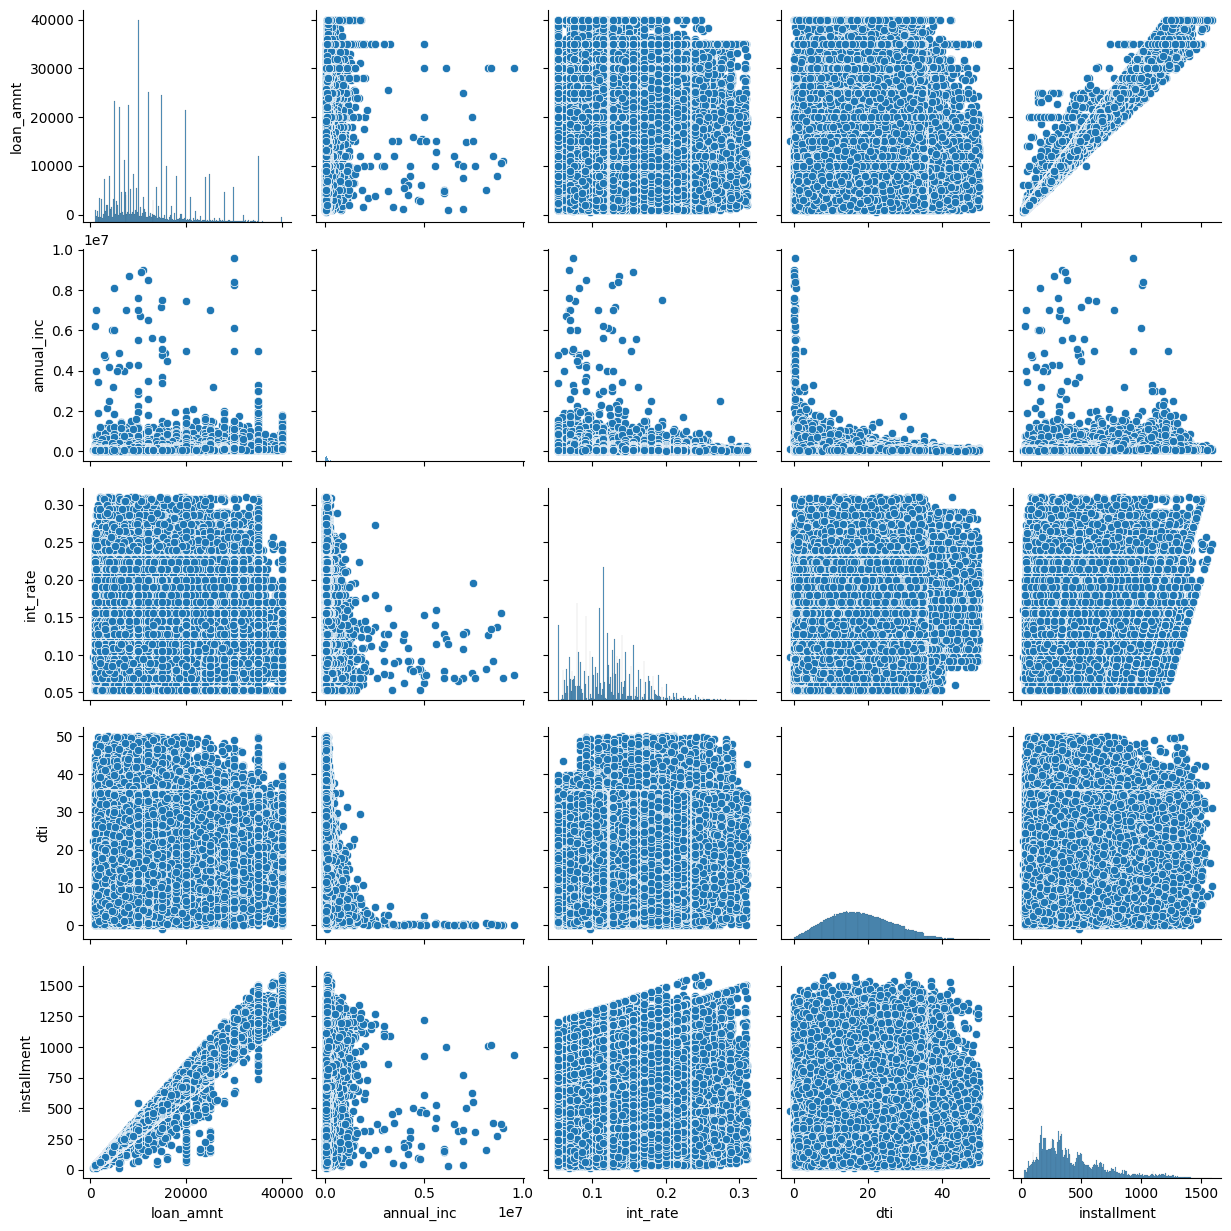

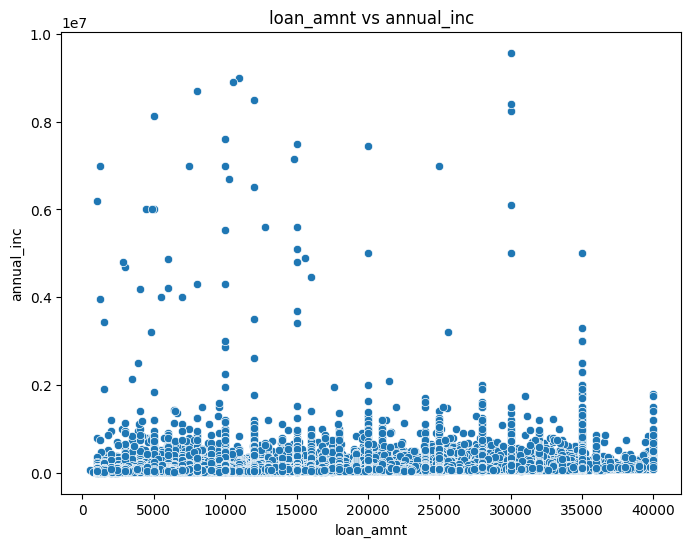

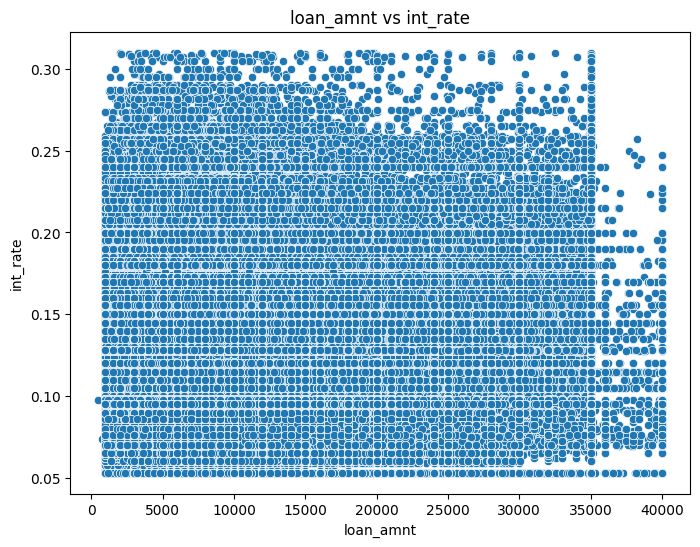

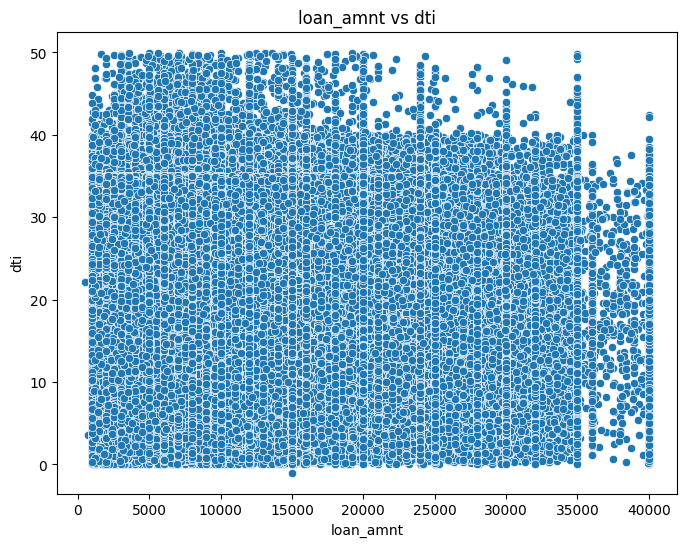

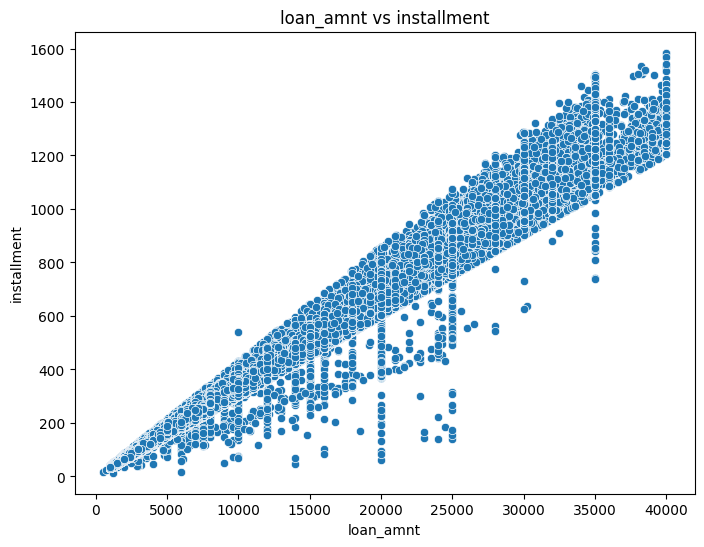

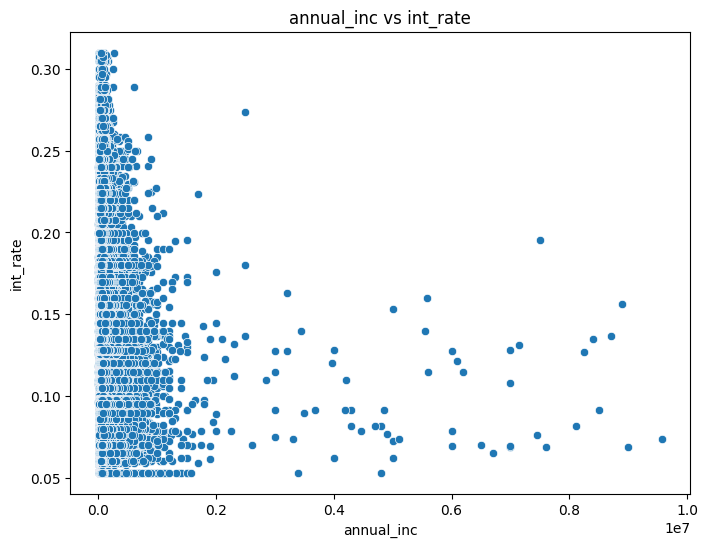

KeyboardInterrupt: 

In [3]:
# Scatter plots

# Create a list of key variables for scatterplots
key_variables = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'installment']

# Create a pairplot for the key variables
sns.pairplot(data[key_variables])
plt.show()


# Create individual scatterplots for specific variable pairs
for i in range(len(key_variables)):
    for j in range(i + 1, len(key_variables)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=key_variables[i], y=key_variables[j], data=data)
        plt.title(f'{key_variables[i]} vs {key_variables[j]}')
        plt.show()


In [ ]:
# Box plots for key variables
plt.figure(figsize=(5, 3))  # Set a smaller figure size
sns.boxplot(data=data[key_variables])
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Individual box plots for better visualization
for col in key_variables:
    plt.figure(figsize=(3,2)) # Smaller figure size
    sns.boxplot(y=data[col]) # Use 'y' argument for vertical box plot
    plt.title(col)
    plt.tight_layout()
    plt.show()

Correlation

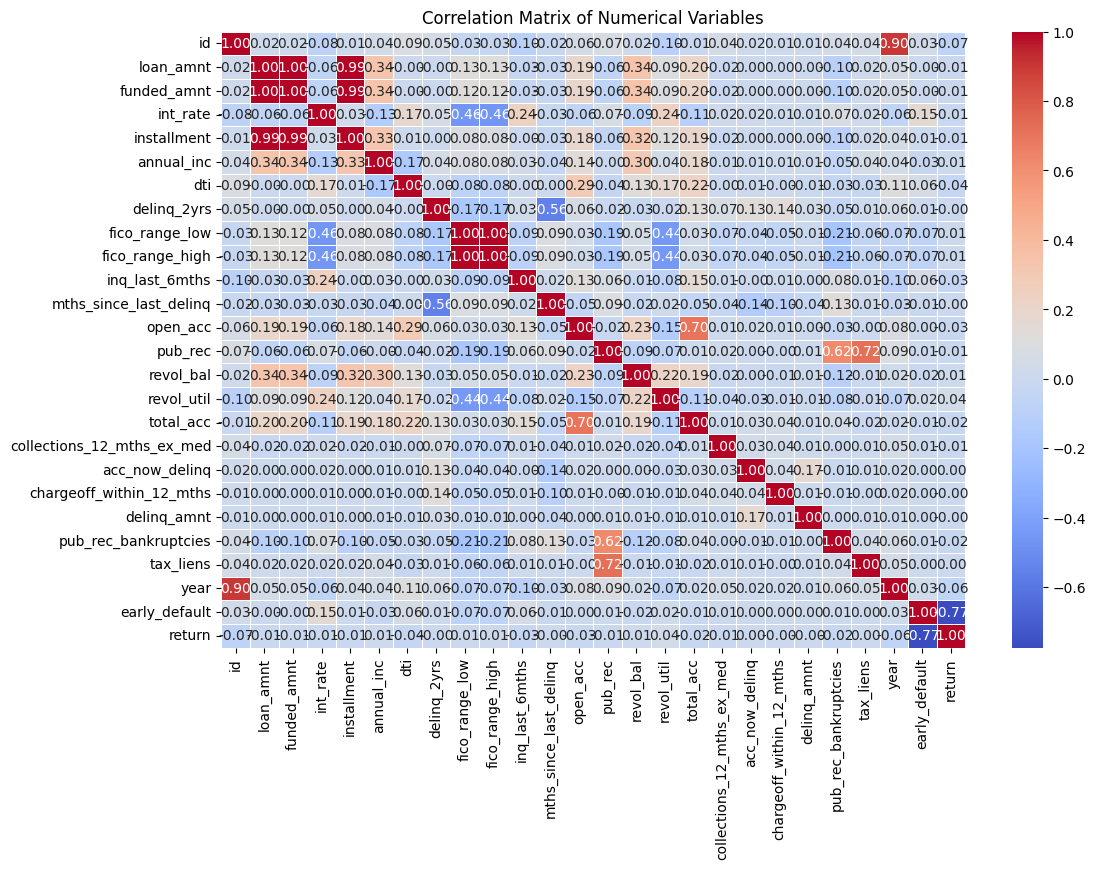

In [3]:
# Step 1: Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Step 2: Compute the correlation matrix for numerical variables
correlation_matrix = numerical_data.corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [4]:
# Find correlations with 'return'
if 'return' in data.columns:
    correlations_with_return = correlation_matrix['return'].drop('return') # Exclude self-correlation
    top_features = correlations_with_return.abs().sort_values(ascending=False)

    print("Top features correlated with 'return':")
    print(top_features.head(10)) # Print top 10, adjust as needed
else:
    print("'return' column not found in the dataset.")

Top features correlated with 'return':
early_default           0.774694
id                      0.069316
year                    0.063327
dti                     0.039181
revol_util              0.036785
inq_last_6mths          0.034340
open_acc                0.025659
total_acc               0.023374
pub_rec_bankruptcies    0.019274
revol_bal               0.014911
Name: return, dtype: float64


Will need to remove 'early_default' since it should be a target variable instead of independent variable

# Data Preprocessing

## Missing values handling

In [5]:
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

emp_length                 58768
mths_since_last_delinq    464293
dtype: int64


In [6]:
import numpy as np
import pandas as pd

# Function to convert emp_length to numeric values
def convert_emp_length(emp_length):
    if pd.isnull(emp_length):  # Handle NaN values
        return 0
    emp_length = str(emp_length)  # Convert to string to avoid AttributeError
    if emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    elif emp_length.isdigit():  # Directly return if it's already a number
        return int(emp_length)
    else:
        return int(emp_length.split()[0])  # Extract the numeric part if formatted as "X years"

# Apply the conversion function to the emp_length column
data['emp_length'] = data['emp_length'].apply(convert_emp_length) # converts string into integer or NaN values

# Fill missing values using the median
data['emp_length'].fillna(data['emp_length'].median(), inplace=True)

# Check results
print(data['emp_length'].head())
print("Missing values after filling:", data['emp_length'].isnull().sum())


0    10
1    10
2    10
3     3
4     9
Name: emp_length, dtype: int64
Missing values after filling: 0


<ipython-input-6-57c7a91d4334>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].fillna(data['emp_length'].median(), inplace=True)


In [5]:
# Find columns with the highest number of missing values
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Percentage', ascending=False)
print(missing_df.head(10)) # Display top 10 columns with highest missing values

                            Missing Values  Percentage
mths_since_last_delinq              464293   49.754919
id                                       0    0.000000
fico_range_low                           0    0.000000
inq_last_6mths                           0    0.000000
open_acc                                 0    0.000000
pub_rec                                  0    0.000000
revol_bal                                0    0.000000
revol_util                               0    0.000000
total_acc                                0    0.000000
collections_12_mths_ex_med               0    0.000000


In [7]:
# Drop the 'mths_since_last_delinq' column since missing ~50%
data = data.drop('mths_since_last_delinq', axis=1)

# Since it should be used a predictor/ target variable only and it is not in the test set
data = data.drop('early_default', axis=1)

 HANDLING THE MISSING VALUES

Found few missing vlaues in the `emp_length` so i transformed the  categorical `emp_length` into numbers (e.g., "10+ years" → 10, "<1 year" → 0) allows for proper model training.

Employment length is an ordinal variable, meaning its distribution may be skewed.Using the median prevents extreme values from influencing the dataset.


Drop the `mths_since_last_delinq` column since missing ~50%

In [8]:
# Check if 'early_default' and 'mths_since_last_delinq' columns exist
if 'early_default' in data.columns:
  print("'early_default' column exists in the DataFrame.")
else:
  print("'early_default' column does not exist in the DataFrame.")

if 'mths_since_last_delinq' in data.columns:
  print("'mths_since_last_delinq' column exists in the DataFrame.")
else:
  print("'mths_since_last_delinq' column does not exist in the DataFrame.")


'early_default' column does not exist in the DataFrame.
'mths_since_last_delinq' column does not exist in the DataFrame.


## Feature Engineering

In [9]:
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
    'tax_liens', 'fico_range_low', 'fico_range_high'
]

# Standardize numerical features to transform them to have mean of 0 and variance of 1
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

Used Standardization (`StandardScaler`) for Numerical Features
Applied `StandardScaler()` from sklearn.preprocessing to transform numerical features. Scaling ensures that variables with large ranges (e.g., annual income vs. interest rate) don’t dominate the model.

Standardization ensures that each feature contributes equally.


Scaled the following features:
Loan amount (`loan_amnt`), interest rate (`int_rate`), annual income (`annual_inc`), debt-to-income ratio (`dti`), FICO score (`fico_range_low`, `fico_range_high`), and more.
Standardized the data to have a mean of 0 and a variance of 1.




In [10]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
data['grade'] = label_encoder.fit_transform(data['grade'])
data['sub_grade'] = label_encoder.fit_transform(data['sub_grade'])
data['emp_length'] = label_encoder.fit_transform(data['emp_length'])

# One-hot encoding for categorical variables
for col in ['home_ownership', 'verification_status', 'purpose', 'addr_state']:
    data[col] = label_encoder.fit_transform(data[col])

In [11]:
# Interaction terms
data['loan_int_prodcut']= data['loan_amnt'] * data['int_rate']    # Captures the combined effect of loan size and interest rate on risk/ return
data['emp_length_annual_inc_interaction'] = data['emp_length'] * data['annual_inc']

# Non-linear term
data["exp_loan_int"] = np.exp(data["loan_amnt"] * data["int_rate"])

## **Reason interactive and non interactive terms **

i chosse linear Interaction Term as  (loan_amnt * int_rate) because, Loan amount and interest rate are two major factors influencing loan risk and profitability.
A larger loan with a high interest rate is riskier and may lead to default.
The interaction term helps the model capture how both factors together influence loan performance, instead of analyzing them separately.


 Nonlinear Term (`exp(loan_amnt * int_rate)`)
Loans may have nonlinear relationships with returns due to:
Compounding effects of interest rates.
Higher loans leading to increasing default risk.
Exponential relationships in financial growth models.


Data Sampling

In [12]:
from sklearn.model_selection import train_test_split

# 'return' is the target variable, and the rest are features
X = data.drop(columns=['id','loan_status','zip_code', 'return'])  # Features
y = data[['return']]  # Target variable

# Split the dataset into 80% training and 20% validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the number of samples in the training and validation sets
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of validation samples: {X_val.shape[0]}")

Number of training samples: 746528
Number of validation samples: 186632


# Model

## Simple Linear Regression

In [13]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Ensure X_train_return is properly initialized
X_train_return, y_train_return = X_train.copy(), y_train['return']
X_val_return, y_val_return = X_val.copy(), y_val['return']

# Convert 'issue_d' and 'earliest_cr_line' to datetime format
if 'issue_d' in X_train_return.columns and 'earliest_cr_line' in X_train_return.columns:
    X_train_return['issue_d'] = pd.to_datetime(X_train_return['issue_d'], format='%b-%Y')
    X_train_return['earliest_cr_line'] = pd.to_datetime(X_train_return['earliest_cr_line'], format='%b-%Y')

    X_val_return['issue_d'] = pd.to_datetime(X_val_return['issue_d'], format='%b-%Y')
    X_val_return['earliest_cr_line'] = pd.to_datetime(X_val_return['earliest_cr_line'], format='%b-%Y')

    # Convert dates to numeric values
    current_year = pd.Timestamp.now().year
    current_month = pd.Timestamp.now().month

    X_train_return['issue_d'] = X_train_return['issue_d'].dt.year + (X_train_return['issue_d'].dt.month / 12)
    X_train_return['earliest_cr_line'] = current_year - X_train_return['earliest_cr_line'].dt.year

    X_val_return['issue_d'] = X_val_return['issue_d'].dt.year + (X_val_return['issue_d'].dt.month / 12)
    X_val_return['earliest_cr_line'] = current_year - X_val_return['earliest_cr_line'].dt.year

# Add a constant (intercept) to the features for statsmodels
X_train_return = sm.add_constant(X_train_return)
X_val_return = sm.add_constant(X_val_return)

# Ensure data types are consistent
X_train_return = X_train_return.astype(float)
X_val_return = X_val_return.astype(float)

# Fit the linear regression model
model = sm.OLS(y_train_return, X_train_return).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     279.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:40:20   Log-Likelihood:                -13166.
No. Observations:              746528   AIC:                         2.640e+04
Df Residuals:                  746493   BIC:                         2.681e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [14]:
# Ensuring the validation set has the same columns as the training set
X_val_return = X_val_return[X_train_return.columns]

In [15]:
print("Train columns:", X_train_return.columns)
print("Validation columns:", X_val_return.columns)

Train columns: Index(['const', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year', 'loan_int_prodcut',
       'emp_length_annual_inc_interaction', 'exp_loan_int'],
      dtype='object')
Validation columns: Index(['const', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mth

In [16]:
# Make predictions
y_train_pred = model.predict(X_train_return)
y_val_pred = model.predict(X_val_return)

# Calculate R-squared values
print(f"In-sample R-squared (Training): {r2_score(y_train_return, y_train_pred):.4f}")
print(f"Out-of-sample R-squared (Validation): {r2_score(y_val_return, y_val_pred):.4f}")

In-sample R-squared (Training): 0.0125
Out-of-sample R-squared (Validation): 0.0125


## Regularized Regression Model

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [18]:
# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': np.linspace(0.1, 1, num=5).tolist()}

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': np.linspace(0.1, 1, num=5).tolist()}

# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net_params = {
    'alpha': np.linspace(0.1, 1, num=5).tolist(),
    'l1_ratio': np.linspace(0.1, 1, num=5).tolist()  # l1_ratio controls the mix of Lasso and Ridge
}

In [19]:
# Lasso Regression
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train_return, y_train_return)
lasso_best = lasso_grid.best_estimator_

# Ridge Regression
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train_return, y_train_return)
ridge_best = ridge_grid.best_estimator_

# Elastic Net Regression
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5)
elastic_net_grid.fit(X_train_return, y_train_return)
elastic_net_best = elastic_net_grid.best_estimator_

In [22]:
print("Train Features:", X_train_return.columns)
print("Validation Features:", X_val_return.columns)

Train Features: Index(['const', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year', 'loan_int_prodcut',
       'emp_length_annual_inc_interaction', 'exp_loan_int'],
      dtype='object')
Validation Features: Index(['const', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6m

In [23]:
# Lasso Regression R-squared
lasso_train_r2 = r2_score(y_train_return, lasso_best.predict(X_train_return))
lasso_test_r2 = r2_score(y_val_return, lasso_best.predict(X_val_return))

# Ridge Regression R-squared
ridge_train_r2 = r2_score(y_train_return, ridge_best.predict(X_train_return))
ridge_test_r2 = r2_score(y_val_return, ridge_best.predict(X_val_return))

# Elastic Net Regression R-squared
elastic_net_train_r2 = r2_score(y_train_return, elastic_net_best.predict(X_train_return))
elastic_net_test_r2 = r2_score(y_val_return, elastic_net_best.predict(X_val_return))

# Print the results
print(f"Lasso Regression: In-sample R^2 = {lasso_train_r2:.4f}, Out-of-sample R^2 = {lasso_test_r2:.4f}")
print(f"Ridge Regression: In-sample R^2 = {ridge_train_r2:.4f}, Out-of-sample R^2 = {ridge_test_r2:.4f}")
print(f"Elastic Net: In-sample R^2 = {elastic_net_train_r2:.4f}, Out-of-sample R^2 = {elastic_net_test_r2:.4f}")

Lasso Regression: In-sample R^2 = 0.0001, Out-of-sample R^2 = -0.0001
Ridge Regression: In-sample R^2 = 0.0125, Out-of-sample R^2 = 0.0124
Elastic Net: In-sample R^2 = 0.0045, Out-of-sample R^2 = 0.0043


# Predict on the Test Set

In [68]:
test_data = pd.read_csv('lc_loan_test.csv')
submission = pd.read_csv('submission_test.csv')

In [69]:
test_missing_data = test_data.isnull().sum()
print(test_missing_data[missing_data > 0])

emp_length                 8374
mths_since_last_delinq    54347
dtype: int64


In [70]:
# Find columns present in the training set but not in the test set
train_cols = X_train.columns
test_cols = test_data.columns

cols_in_train_not_in_test = set(train_cols) - set(test_cols)
cols_in_test_not_in_train = set(test_cols) - set(train_cols)

print("Columns in training set but not in test set:")
print(cols_in_train_not_in_test)

print("\nColumns in test set but not in training set:")
cols_in_test_not_in_train


Columns in training set but not in test set:
{'exp_loan_int', 'loan_int_prodcut', 'emp_length_annual_inc_interaction'}

Columns in test set but not in training set:


{'id', 'mths_since_last_delinq', 'zip_code'}

In [71]:
# Apply the conversion function to the emp_length column
test_data['emp_length'] = test_data['emp_length'].apply(convert_emp_length)

# Check the converted column
print(test_data['emp_length'].head())

# Fill missing values using the median
test_data['emp_length'].fillna(test_data['emp_length'].median(), inplace=True)

# Check if there are any missing values left
print(test_data['emp_length'].isnull().sum())

0     3
1    10
2    10
3    10
4    10
Name: emp_length, dtype: int64
0


<ipython-input-71-21897cbac3a4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['emp_length'].fillna(test_data['emp_length'].median(), inplace=True)


In [72]:
# Drop the 'mths_since_last_delinq' column since missing >50%
test_data = test_data.drop('mths_since_last_delinq', axis=1)

test_data = test_data.drop('zip_code', axis=1)
test_data = test_data.drop('id', axis=1)

In [73]:
test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])

test_data['grade'] = label_encoder.fit_transform(test_data['grade'])
test_data['sub_grade'] = label_encoder.fit_transform(test_data['sub_grade'])
test_data['emp_length'] = label_encoder.fit_transform(test_data['emp_length'])

for col in ['home_ownership', 'verification_status', 'purpose', 'addr_state']:
    test_data[col] = label_encoder.fit_transform(test_data[col])

# Extract year from 'issue_d' and 'earliest_cr_line'
test_data['issue_d'] = pd.to_datetime(test_data['issue_d']).dt.year
test_data['earliest_cr_line'] = pd.to_datetime(test_data['earliest_cr_line']).dt.year

# Interaction term
test_data['loan_int_prodcut'] = test_data['loan_amnt'] * test_data['int_rate']
test_data['emp_length_annual_inc_interaction'] = test_data['emp_length'] * test_data['annual_inc']

# Nonlinear term
test_data['exp_loan_int'] = np.exp(test_data["loan_amnt"] * test_data["int_rate"])

# X_test = test_data.drop(columns=['id','zip_code'])
X_test_const = X_test.copy()

X_test_const.insert(0, 'const', 1)

print(X_test_const.head())

   const  loan_amnt  funded_amnt  int_rate  installment  grade  sub_grade  \
0      1  -0.273242    -0.273242 -1.050772    -0.348363      0          3   
1      1   0.069522     0.069522 -0.177501     0.049565      1          8   
2      1  -1.070168    -1.070168 -1.161313    -1.086650      0          1   
3      1  -0.387496    -0.387496 -0.188555    -0.398231      1          7   
4      1  -0.044732    -0.044732 -1.161313    -0.146651      0          1   

   emp_length  home_ownership  annual_inc  ...  collections_12_mths_ex_med  \
0           3               3   -0.149072  ...                    -0.13899   
1          10               3   -0.126307  ...                    -0.13899   
2          10               1    0.017871  ...                    -0.13899   
3          10               1   -0.098483  ...                    -0.13899   
4          10               1   -0.118719  ...                    -0.13899   

   acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       

<ipython-input-73-1bfc316ece9d>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['issue_d'] = pd.to_datetime(test_data['issue_d']).dt.year
<ipython-input-73-1bfc316ece9d>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['earliest_cr_line'] = pd.to_datetime(test_data['earliest_cr_line']).dt.year


In [74]:
# Find columns present in the training set but not in the test set
train_cols = X_train.columns
test_cols = test_data.columns

cols_in_train_not_in_test = set(train_cols) - set(test_cols)
cols_in_test_not_in_train = set(test_cols) - set(train_cols)

print("Columns in training set but not in test set:")
print(cols_in_train_not_in_test)

print("\nColumns in test set but not in training set:")
cols_in_test_not_in_train

Columns in training set but not in test set:
set()

Columns in test set but not in training set:


set()

In [75]:
y_test_return = ridge_best.predict(X_test_const)
y_test_return = np.round(y_test_return, 2)

# 3. Replace the values in the submission file
submission['return'] = y_test_return

In [81]:
# Ensure X_test_const has the same columns as X_train_return
X_test_return = X_test.reindex(columns=X_train_return.columns, fill_value=0)

# Predict loan returns using the trained Ridge model
y_test_return = ridge_best.predict(X_test_return)
y_test_return = np.round(y_test_return, 4)

# 3. Replace the values in the submission file
submission['return'] = y_test_return

In [82]:
submission.to_csv('submission_test.csv', index=False)

## **Reason interactive and non interactive terms **

i chosse linear Interaction Term as  (loan_amnt * int_rate) because, Loan amount and interest rate are two major factors influencing loan risk and profitability.
A larger loan with a high interest rate is riskier and may lead to default.
The interaction term helps the model capture how both factors together influence loan performance, instead of analyzing them separately.


 Nonlinear Term (`exp(loan_amnt * int_rate)`)
Loans may have nonlinear relationships with returns due to:
Compounding effects of interest rates.
Higher loans leading to increasing default risk.
Exponential relationships in financial growth models.


Used Standardization (`StandardScaler`) for Numerical Features
Applied `StandardScaler()` from sklearn.preprocessing to transform numerical features. Scaling ensures that variables with large ranges (e.g., annual income vs. interest rate) don’t dominate the model.

Standardization ensures that each feature contributes equally.


Scaled the following features:
Loan amount (`loan_amnt`), interest rate (`int_rate`), annual income (`annual_inc`), debt-to-income ratio (`dti`), FICO score (`fico_range_low`, `fico_range_high`), and more.
Standardized the data to have a mean of 0 and a variance of 1.


